In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Download the csv files from below links

#for Books.csv , Users.csv , Ratings.csv
#https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
#for goodreads_data.csv (for genres data)
#https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data

In [2]:
# to read the books.csv data
books = pd.read_csv('Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
# to read the user.csv data
users = pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
# to read the ratings.csv data
ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [172]:
# to read the goodreads_data.csv data
goodreads = pd.read_csv('goodreads_data.csv')
goodreads.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


# EDA

## 1) books.csv

In [6]:
# to see the shape of the book data
books.shape

(271360, 8)

In [7]:
# to see the values datatypes
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
# to see the statistical information
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [9]:
# to see the duplicated values
books.duplicated().sum()

0

In [10]:
# to see is there any null values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
# as we can see there is 1 null in book-author, 2 in publisher and 3 in Image-URL-L
#here ISBN = international standard book number i.e. its a unique number given to the books

In [12]:
# lets see which rows contains the null book_Author value
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [13]:
# to drop the na value in author column
#books.dropna(subset=['Book-Author'], inplace=True)

In [14]:
# to see the rows which contains null publisher
books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [15]:
# # to drop the na value in publisher column
#books.dropna(subset=['Publisher'], inplace=True)

In [16]:
''' the book author name and publisher not given so we can use either 1 of them to recommand but when both needed we cant use them
so if in further exploration we find to drop them we would'''

' the book author name and publisher not given so we can use either 1 of them to recommand but when both needed we cant use them\nso if in further exploration we find to drop them we would'

In [17]:
# as we can see the url (links) of images are not needed in data exploration so we would drop them
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [18]:
# dropping the urls
books1 = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1)
books1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [19]:
# lets change some column names for simplicity
books1 = books1.rename(columns={'Book-Title':'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Publisher':'publisher'})
books1

,ISBN,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [20]:
# to see unique values in book_title
books1['book_title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [21]:
# to see unique values in book_author
books1['book_author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [22]:
# to see unique values in book_author
books1['year_of_publication'].unique() # there is some publication names

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [23]:
# as we can see the year_of_publication contains the object datatype because of of the values are str type
# but we cant change them directly because there are some actual str values 'DK Publishing Inc' and 'Gallimard'
# so seeing the year of publication which contains the 'DK Publishing Inc' and 'Gallimard' rows
books1[(books1['year_of_publication'].isin(['DK Publishing Inc', 'Gallimard']))]

,ISBN,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [24]:
# to see the rows where year_of_publication value is 'DK Publishing Inc' or 'Gallimard'
books1[(books1['year_of_publication'].isin(['DK Publishing Inc', 'Gallimard']))]

,ISBN,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [25]:
# seeing the book title column unique values
books1[(books1['ISBN'].isin(["078946697X", "2070426769", "0789466953"]))].book_title.unique() # column contains both book name and book author names

array(['DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"',
       'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"',
       'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'],
      dtype=object)

In [26]:
# seems like the values shifted to the left side because of some glitch
# as we can see here author column values combined with the books_name, book_author contains the year of publication and year of publication contains the publisher so fixing it
# Shift year_of_publication value to publisher column and book_author value to year_of_publication column
books1.loc[books1['year_of_publication'].isin(['DK Publishing Inc', 'Gallimard']), 'publisher'] = books1['year_of_publication']
books1.loc[books1['year_of_publication'].isin(['DK Publishing Inc', 'Gallimard']), 'year_of_publication'] = books1['book_author']

In [27]:
# making book_author1 to store values splitted from book_title splitted by '\\\\";'
books1[['book_title', 'book_author1']] = books1['book_title'].str.split('\\\\";', 1, expand=True)
# seeing book_title
books1[(books1['ISBN'].isin(["078946697X", "2070426769", "0789466953"]))].book_title.unique()

array(['DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)',
       "Peuple du ciel, suivi de 'Les Bergers",
       'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'],
      dtype=object)

In [28]:
# checking the rows by isbn for changes done
books1[(books1['ISBN'].isin(["078946697X", "2070426769", "0789466953"]))]

,ISBN,book_title,book_author,year_of_publication,publisher,book_author1
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,2000,DK Publishing Inc,"Michael Teitelbaum"""
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",2003,2003,Gallimard,"Jean-Marie Gustave Le ClÃ?Â©zio"""
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,2000,DK Publishing Inc,"James Buckley"""


In [29]:
# the book_author1 contains name ending with '"' so stripping it
books1['book_author1'] = books1['book_author1'].str.strip('"')
books1[(books1['ISBN'].isin(["078946697X", "2070426769", "0789466953"]))]

,ISBN,book_title,book_author,year_of_publication,publisher,book_author1
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,2000,DK Publishing Inc,Michael Teitelbaum
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",2003,2003,Gallimard,Jean-Marie Gustave Le ClÃ?Â©zio
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,2000,DK Publishing Inc,James Buckley


In [30]:
# replacing the value in book_author from book_author1 for proper values
books1.loc[books1['ISBN'].isin(["078946697X", "2070426769", "0789466953"]), 'book_author'] = books1['book_author1']
# we no longer need the book_author1 column so dropping it
books1.drop('book_author1',axis=1,inplace =True)
books1[(books1['ISBN'].isin(["078946697X", "2070426769", "0789466953"]))]

,ISBN,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [31]:
# to see unique values in year_of_publication
books1['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [32]:
# now there is not any string which we can't change in the numeric so now changing year_of_publication to numeric
books1['year_of_publication'] = books1['year_of_publication'].astype(int)
books1['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [33]:
# to see is there any zero values
books1[(books1['year_of_publication'].isin([0]))]

,ISBN,book_title,book_author,year_of_publication,publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [34]:
# year of publication can't be zero so removing the value
books1['year_of_publication'] = books1['year_of_publication'].replace('0',0)
books1['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [35]:
# to see unique values in publisher
books1['publisher'].unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [36]:
# to see is there any null values
books1.isna().sum()

ISBN                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [37]:
# to see the na values in book author column
books1.loc[books1['book_author'].isna()]

,ISBN,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [38]:
# checking for same isbn is there any other row
books1.loc[books1['ISBN'] == '9627982032']

,ISBN,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [39]:
books1.loc[books1['ISBN'] == '9627982032'].book_title.unique()

array(['The Credit Suisse Guide to Managing Your Personal Wealth'],
      dtype=object)

In [40]:
books1[books1['book_title'].isin(['The Credit Suisse Guide to Managing Your Personal Wealth'])]

,ISBN,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [41]:
# as we can see there is not any row with same values so lets replace book author with the empty string
books1['book_author'].fillna('',inplace=True)

In [42]:
books1.loc[books1['publisher'].isna()]

,ISBN,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [43]:
# checking for same isbn is there any other row
books1[books1['ISBN'].isin(['1931696993', '193169656X'])] # there is not any row with same isbn

,ISBN,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [44]:
books1[books1['book_title'].isin(('Tyrant Moon', 'Finders Keepers'))] # there is not any matching row with same values

,ISBN,book_title,book_author,year_of_publication,publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [45]:
# there is not any similar rows so changing publisher column to empty string for not getting error in further process
books1['publisher'].fillna('',inplace=True)

In [46]:
# to see is there any null values
books1.isna().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

## 2) users.csv

In [47]:
# to see the shape of the users data
users.shape

(278858, 3)

In [48]:
# to see the values datatypes
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [49]:
# as we can see the age contains the huge amount of the null values

In [50]:
# to see the statistical information
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [51]:
# to see is there any null values
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [52]:
# as we can see over 11k age data is NA,but as we know the age not essentially matters in the review

In [53]:
# lets see which rows contains the null Age value
users[users['Age'].isnull()]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [54]:
#lets drop the age columns because its not essentially maters in the review
# dropping the Age column
#users = users.drop(['Age'], axis = 1)
#users

In [55]:
# lets change USER-ID column names for simplicity
users1 = users.rename(columns={'User-ID':'user_id'})
users1

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [56]:
# to see unique values in age column
users1.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [57]:
# to see the age less than 8 rows
users1[users1['Age'] < 8]

,user_id,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
670,671,"jeddah, jeddah, saudi arabia",1.0
...,...,...,...
276784,276785,"bolton, england, united kingdom",1.0
276889,276890,"dorset, england, united kingdom",0.0
277075,277076,"batam, riau, indonesia",3.0
277908,277909,"phoenix, arizona, usa",2.0


In [58]:
# some values in the age are not possible as age less than 8 people how can they rate any book, so removing these values and changing them to 0
users1.loc[users1['Age'] < 8, 'Age'] = 0

In [59]:
# to see the age less than 8 rows
users1[users1['Age'] < 8]

,user_id,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",0.0
670,671,"jeddah, jeddah, saudi arabia",0.0
...,...,...,...
276784,276785,"bolton, england, united kingdom",0.0
276889,276890,"dorset, england, united kingdom",0.0
277075,277076,"batam, riau, indonesia",0.0
277908,277909,"phoenix, arizona, usa",0.0


In [60]:
# to see unique values in age column
users1.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64., 103.,
       104.,  12.,  74.,  75., 231.,  76.,  83.,  68., 119.,  11.,  77.,
        70.,  93.,   8.,  81., 114., 230., 239.,  10., 148., 151., 101.,
       201.,  96.,  84.,  82.,  90., 123., 244., 133.,  91., 128.,  94.,
        85., 141., 110.,  97., 219.,  86., 124.,  92., 175., 172., 209.,
       212., 237.,  87., 162., 100., 156., 136.,  95.,  89., 106.,  99.,
       108., 210.,  88., 199., 147., 168., 132., 159., 186., 152., 102.,
       116., 200., 115., 226., 137., 207., 229., 138., 109., 105., 228.,
       183., 204.,  98., 223., 113., 208., 107., 15

In [61]:
# we cant use age in the calculation so we change it a little bit like to adult and child form so we can use them
def age_to_category(age):
    if age is None:
        return None
    elif age >= 18:
        return 'Adult'
    else:
        return 'Child'

# Apply the function to the 'age' column
users1['Age'] = users1['Age'].apply(age_to_category)
users1

,user_id,Location,Age
0,1,"nyc, new york, usa",Child
1,2,"stockton, california, usa",Adult
2,3,"moscow, yukon territory, russia",Child
3,4,"porto, v.n.gaia, portugal",Child
4,5,"farnborough, hants, united kingdom",Child
...,...,...,...
278853,278854,"portland, oregon, usa",Child
278854,278855,"tacoma, washington, united kingdom",Adult
278855,278856,"brampton, ontario, canada",Child
278856,278857,"knoxville, tennessee, usa",Child


In [62]:
# there are multiple values in location are na but showed as n/a and seperated by comma
#so splitting the values and then removing na
users1[['City', 'State', 'Country']] = users1['Location'].str.split(', ', n=2, expand=True)
users1.drop(['Location'],axis=1,inplace=True)
users1

,user_id,Age,City,State,Country
0,1,Child,nyc,new york,usa
1,2,Adult,stockton,california,usa
2,3,Child,moscow,yukon territory,russia
3,4,Child,porto,v.n.gaia,portugal
4,5,Child,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,Child,portland,oregon,usa
278854,278855,Adult,tacoma,washington,united kingdom
278855,278856,Child,brampton,ontario,canada
278856,278857,Child,knoxville,tennessee,usa


In [63]:
users1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  278858 non-null  int64 
 1   Age      278858 non-null  object
 2   City     278858 non-null  object
 3   State    278857 non-null  object
 4   Country  274281 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.6+ MB


In [64]:
# as we can see insted of null there is n/a given which can't recoganized by the python so we would change them to empty strings
users1[['City', 'State', 'Country']] = users1[['City', 'State', 'Country']].replace('n/a',pd.NA)
users1

,user_id,Age,City,State,Country
0,1,Child,nyc,new york,usa
1,2,Adult,stockton,california,usa
2,3,Child,moscow,yukon territory,russia
3,4,Child,porto,v.n.gaia,portugal
4,5,Child,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,Child,portland,oregon,usa
278854,278855,Adult,tacoma,washington,united kingdom
278855,278856,Child,brampton,ontario,canada
278856,278857,Child,knoxville,tennessee,usa


In [65]:
# as we can see insted of null there is n/a given which can't recoganized by the python so we would change them to empty strings
users1[['City', 'State', 'Country']] = users1[['City', 'State', 'Country']].fillna('')
users1

,user_id,Age,City,State,Country
0,1,Child,nyc,new york,usa
1,2,Adult,stockton,california,usa
2,3,Child,moscow,yukon territory,russia
3,4,Child,porto,v.n.gaia,portugal
4,5,Child,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,Child,portland,oregon,usa
278854,278855,Adult,tacoma,washington,united kingdom
278855,278856,Child,brampton,ontario,canada
278856,278857,Child,knoxville,tennessee,usa


In [66]:
users1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  278858 non-null  int64 
 1   Age      278858 non-null  object
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.6+ MB


## 3) ratings.csv

In [67]:
# to see the shape of the ratings data
ratings.shape

(1149780, 3)

In [68]:
# to see the values datatypes
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [69]:
# as we can see there is not any null values

In [70]:
# to see the statistical information
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [71]:
# lets change USER-ID column names for simplicity
ratings1 = ratings.rename(columns={'User-ID':'user_id','Book-Rating':'book_rating'})
ratings1

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [72]:
# Dividing the 'user_rating' column by 2 to change the scale from 10 to 5
ratings1['book_rating'] = ratings1['book_rating'] / 2
# to round the ratings to one decimal place
ratings1['book_rating'] = ratings1['book_rating'].round(1)
ratings1

,user_id,ISBN,book_rating
0,276725,034545104X,0.0
1,276726,0155061224,2.5
2,276727,0446520802,0.0
3,276729,052165615X,1.5
4,276729,0521795028,3.0
...,...,...,...
1149775,276704,1563526298,4.5
1149776,276706,0679447156,0.0
1149777,276709,0515107662,5.0
1149778,276721,0590442449,5.0


In [73]:
# makin total number of ratings on that book column
num_rating = ratings1.groupby('ISBN').count()['book_rating'].reset_index()
num_rating.rename(columns={'book_rating':'num_ratings'},inplace=True)
num_rating

,ISBN,num_ratings
0,0330299891,2
1,0375404120,2
2,0586045007,1
3,9022906116,2
4,9032803328,1
...,...,...
340551,cn113107,1
340552,ooo7156103,1
340553,§423350229,1
340554,´3499128624,1


In [74]:
# making average rating column
avg_rating = ratings1.groupby('ISBN').mean()['book_rating'].reset_index()
avg_rating.rename(columns={'book_rating':'avg_rating'},inplace=True)
avg_rating

,ISBN,avg_rating
0,0330299891,1.50
1,0375404120,0.75
2,0586045007,0.00
3,9022906116,1.75
4,9032803328,0.00
...,...,...
340551,cn113107,0.00
340552,ooo7156103,3.50
340553,§423350229,0.00
340554,´3499128624,4.00


In [75]:
ratings_df = num_rating.merge(avg_rating,on='ISBN')
ratings_df

,ISBN,num_ratings,avg_rating
0,0330299891,2,1.50
1,0375404120,2,0.75
2,0586045007,1,0.00
3,9022906116,2,1.75
4,9032803328,1,0.00
...,...,...,...
340551,cn113107,1,0.00
340552,ooo7156103,1,3.50
340553,§423350229,1,0.00
340554,´3499128624,1,4.00


In [76]:
ratings1 = ratings1.merge(ratings_df,on='ISBN')
ratings1

,user_id,ISBN,book_rating,num_ratings,avg_rating
0,276725,034545104X,0.0,60,1.466667
1,2313,034545104X,2.5,60,1.466667
2,6543,034545104X,0.0,60,1.466667
3,8680,034545104X,2.5,60,1.466667
4,10314,034545104X,4.5,60,1.466667
...,...,...,...,...,...
1149775,276688,1575660792,3.5,1,3.500000
1149776,276690,0590907301,0.0,1,0.000000
1149777,276704,0679752714,0.0,1,0.000000
1149778,276704,0806917695,2.5,1,2.500000


In [77]:
ratings1.shape

(1149780, 5)

In [78]:
ratings1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   user_id      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   book_rating  1149780 non-null  float64
 3   num_ratings  1149780 non-null  int64  
 4   avg_rating   1149780 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 52.6+ MB


# 4) goodreads_data.csv

In [79]:
# to see the shape of the goodreads data
goodreads.shape

(10000, 8)

In [80]:
# to see the values datatypes
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [81]:
# to see the statistical information
goodreads.describe()

,Unnamed: 0,Avg_Rating
count,10000.00000,10000.000000
mean,4999.50000,4.068577
std,2886.89568,0.335359
min,0.00000,0.000000
25%,2499.75000,3.880000
50%,4999.50000,4.080000
75%,7499.25000,4.260000
max,9999.00000,5.000000


In [82]:
# to see is there any null values
goodreads.isna().sum()

Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64

In [83]:
# dropping the
goodreads.drop(['URL','Unnamed: 0'],axis=1,inplace = True)

In [84]:
# lets see which rows contains the null book_Author value
goodreads[goodreads['Description'].isnull()]

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings
1066,A Decade of Desire: Erotic Tales from the Char...,Charles Dyson,NaN,"['Contemporary', 'Epic', 'Romance', 'Erotica']",4.34,730
1224,"Complicated Moonlight (DCYE, #2)",Lynessa Layne,NaN,"['Romance', 'Reverse Harem']",4.29,234
1745,"Mad Love (DCYE, #3)",Lynessa Layne,NaN,"['Reverse Harem', 'Romance']",4.23,147
2104,The Spirit of Prayer: The Believer's Authority...,Tolulope Oyewole,NaN,"['Contemporary', 'Novels']",4.45,201
2270,Lift: Five Practices Great Managers Do Consist...,Raymond Wheeler,NaN,"['Nonfiction', 'How To', 'Business', 'Self Hel...",4.30,125
...,...,...,...,...,...,...
9746,You'll Need a Guardian Angel,Victor Piasecki,NaN,[],3.83,6
9806,A Touch Of Greatness,Frank Tibolt,NaN,[],4.00,13
9834,Mireasma trandafirilor salbatici,Sorina Popescu,NaN,['Romanian Literature'],4.64,14
9850,Iron Butterfly: A Novel of Africa,Clara Whaley Perkins,NaN,[],3.83,6


In [85]:
# fii na of description to empty strings to not get error adfterwords
goodreads['Description'].fillna('',inplace=True)
goodreads['Description'].isna().sum()

0

In [86]:
# to see unique values in Book
goodreads['Book'].unique()

array(['To Kill a Mockingbird',
       'Harry Potter and the Philosopher’s Stone (Harry Potter, #1)',
       'Pride and Prejudice', ..., 'The Republic of Trees',
       'Waking Up (Healing Hearts, #1)',
       'Bits and Pieces: Tales and Sonnets'], dtype=object)

In [87]:
# to see unique values in Author
goodreads['Author'].unique()

array(['Harper Lee', 'J.K. Rowling', 'Jane Austen', ..., 'Sam Taylor',
       'Renee Dyer', 'Jas T. Ward'], dtype=object)

In [88]:
# to see unique values in Description
goodreads['Description'].unique()

array(['The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it. "To Kill A Mockingbird" became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, "To Kill A Mockingbird" takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American literature.',
       'Harry Potter thinks he is an ordinary boy - until he is rescued by an owl, taken to Hogwarts School of Witchcraft and Wizardry, learns to play Quidditch and does b

In [89]:
# to see unique values in Genres
goodreads['Genres']

0       ['Classics', 'Fiction', 'Historical Fiction', ...
1       ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...
2       ['Classics', 'Fiction', 'Romance', 'Historical...
3       ['Classics', 'Nonfiction', 'History', 'Biograp...
4       ['Classics', 'Fiction', 'Dystopia', 'Fantasy',...
                              ...                        
9995    ['Dystopia', 'Science Fiction', 'Post Apocalyp...
9996                                                   []
9997    ['Fiction', 'Horror', 'Dystopia', 'Coming Of A...
9998    ['New Adult', 'Romance', 'Contemporary Romance...
9999                                                   []
Name: Genres, Length: 10000, dtype: object

In [90]:
# as we can see the book_title & books and book_author & author are same columns with different names in books and goodreads
goodreads.columns

Index(['Book', 'Author', 'Description', 'Genres', 'Avg_Rating', 'Num_Ratings'], dtype='object')

In [91]:
# because this data is different we using this one only for the genre and description of the movies
goodreads1= goodreads.drop(['Avg_Rating', 'Num_Ratings'],axis=1)
goodreads1

,Book,Author,Description,Genres
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."
...,...,...,...,...
9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp..."
9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[]
9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A..."
9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance..."


In [92]:
# lets change some column names for simplicity
goodreads1 = goodreads1.rename(columns={'Book':'book_title','Author':'book_author'})
goodreads1

,book_title,book_author,Description,Genres
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."
...,...,...,...,...
9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp..."
9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[]
9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A..."
9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance..."


# Merging all the 4 data sets

In [93]:
# Merge the ratings1 with books1 based on the common column 'ISBN'
merged_df = pd.merge(books1, ratings1, on='ISBN', how='inner')
# here used inner to take only common data from the datasets
# Merge the users1 based on the common column 'user_id'
final_merged_df = pd.merge(merged_df, users1, on='user_id', how='inner')
# Merge the goodreads1 based on the common column 'book_title' and 'book_author' both
df = pd.merge(final_merged_df, goodreads1, on=['book_title', 'book_author'])
df.head()

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,4.5,33,2.106061,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,4.0,273,1.437729,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
3,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,85526,0.0,273,1.437729,Adult,victoria,british columbia,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
4,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,110912,4.5,273,1.437729,Adult,milpitas,california,usa,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."


## merged data EDA

In [94]:
# to see the column names
df.columns

Index(['ISBN', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'user_id', 'book_rating', 'num_ratings', 'avg_rating', 'Age', 'City',
       'State', 'Country', 'Description', 'Genres'],
      dtype='object')

In [95]:
# to see the shape of the mdf data
df.shape

(65676, 15)

In [96]:
# to see the values datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65676 entries, 0 to 65675
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 65676 non-null  object 
 1   book_title           65676 non-null  object 
 2   book_author          65676 non-null  object 
 3   year_of_publication  65676 non-null  int32  
 4   publisher            65676 non-null  object 
 5   user_id              65676 non-null  int64  
 6   book_rating          65676 non-null  float64
 7   num_ratings          65676 non-null  int64  
 8   avg_rating           65676 non-null  float64
 9   Age                  65676 non-null  object 
 10  City                 65676 non-null  object 
 11  State                65676 non-null  object 
 12  Country              65676 non-null  object 
 13  Description          65676 non-null  object 
 14  Genres               65676 non-null  object 
dtypes: float64(2), int32(1), int64(2), o

In [97]:
# again to see the values datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65676 entries, 0 to 65675
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 65676 non-null  object 
 1   book_title           65676 non-null  object 
 2   book_author          65676 non-null  object 
 3   year_of_publication  65676 non-null  int32  
 4   publisher            65676 non-null  object 
 5   user_id              65676 non-null  int64  
 6   book_rating          65676 non-null  float64
 7   num_ratings          65676 non-null  int64  
 8   avg_rating           65676 non-null  float64
 9   Age                  65676 non-null  object 
 10  City                 65676 non-null  object 
 11  State                65676 non-null  object 
 12  Country              65676 non-null  object 
 13  Description          65676 non-null  object 
 14  Genres               65676 non-null  object 
dtypes: float64(2), int32(1), int64(2), o

In [98]:
# to see the statistical information
df.describe()

,year_of_publication,user_id,book_rating,num_ratings,avg_rating
count,65676.000000,65676.000000,65676.000000,65676.000000,65676.000000
mean,1972.465041,138483.007309,1.686666,153.901943,1.686666
std,212.691108,80624.964704,2.033613,162.940239,0.574931
min,0.000000,8.000000,0.000000,1.000000,0.000000
25%,1992.000000,68555.000000,0.000000,30.000000,1.420886
50%,1997.000000,136382.000000,0.000000,93.000000,1.632000
75%,2001.000000,209373.000000,4.000000,216.000000,1.994382
max,2021.000000,278849.000000,5.000000,647.000000,5.000000


In [99]:
# to see the column names
df.columns

Index(['ISBN', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'user_id', 'book_rating', 'num_ratings', 'avg_rating', 'Age', 'City',
       'State', 'Country', 'Description', 'Genres'],
      dtype='object')

In [100]:
# to see the duplicated values
df.duplicated().sum()

0

In [101]:
# to see is there any null values
df.isna().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
user_id                0
book_rating            0
num_ratings            0
avg_rating             0
Age                    0
City                   0
State                  0
Country                0
Description            0
Genres                 0
dtype: int64

In [102]:
# dealing with null values in age column
# Additional keywords for children's books
children_keywords = ['child', 'kids', 'young adult', 'youth', 'toddler', 'baby', 'preschool', 'elementary', 'middle grade', 'board book', 'nursery rhymes', 'bedtime story', 'fairy tale', 'storybook', 'coloring book', 'activity book', 'picture storybook', 'picture story', 'easy reader', 'early reader', 'chapter book', 'illustrated']
# Function to set age group based on book description
def set_age_group(description):
    if isinstance(description, str):
        for keyword in children_keywords:
            if keyword in description.lower():
                return 'Child'
    return 'Adult'
# Apply the function to replace null values in the 'Age' column
df['Age'] = df['Age'].fillna(df['Description'].apply(set_age_group))

# Display the updated DataFrame
df

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,4.5,33,2.106061,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,4.0,273,1.437729,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
3,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,85526,0.0,273,1.437729,Adult,victoria,british columbia,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
4,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,110912,4.5,273,1.437729,Adult,milpitas,california,usa,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65671,0553262165,Farewell to Manzanar: A True Story of Japanese...,Jeanne Wakatsuki Houston,1986,Bantam Books,130717,4.0,1,4.000000,Child,longmont,colorado,usa,Jeanne Wakatsuki was seven years old in 1942 w...,"['Nonfiction', 'History', 'Memoir', 'Biography..."
65672,0060907924,A People's History of the United States,Howard Zinn,1980,Harpercollins,188029,5.0,1,5.000000,Adult,stockton,california,usa,"In the book, Zinn presented a different side o...","['History', 'Nonfiction', 'Politics', 'America..."
65673,0451525256,The Ox-Bow Incident,Walter Van Tilburg Clark,1996,Signet Classics,77074,2.5,1,2.500000,Adult,wynne,arkansas,usa,"Set in 1885, The Ox-Bow Incident is a searing ...","['Fiction', 'Westerns', 'Classics', 'Historica..."
65674,1840184159,First They Killed My Father: A Daughter of Cam...,Loung Ung,2001,Mainstream Publishing,79481,0.0,1,0.000000,Adult,london,england,united kingdom,From a childhood survivor of the Cambodian gen...,"['Nonfiction', 'History', 'Memoir', 'Biography..."


In [103]:
# Seeing the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65676 entries, 0 to 65675
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 65676 non-null  object 
 1   book_title           65676 non-null  object 
 2   book_author          65676 non-null  object 
 3   year_of_publication  65676 non-null  int32  
 4   publisher            65676 non-null  object 
 5   user_id              65676 non-null  int64  
 6   book_rating          65676 non-null  float64
 7   num_ratings          65676 non-null  int64  
 8   avg_rating           65676 non-null  float64
 9   Age                  65676 non-null  object 
 10  City                 65676 non-null  object 
 11  State                65676 non-null  object 
 12  Country              65676 non-null  object 
 13  Description          65676 non-null  object 
 14  Genres               65676 non-null  object 
dtypes: float64(2), int32(1), int64(2), o

In [104]:
# to see the value counts in genre
df['Genres'].value_counts()

['Fiction', 'Thriller', 'Mystery', 'Legal Thriller', 'Suspense', 'Crime', 'Mystery Thriller']                  1355
['Romance', 'Fiction', 'Chick Lit', 'Contemporary', 'Adult', 'Adult Fiction', 'Contemporary Romance']          1320
['Fiction', 'Thriller', 'Mystery', 'Legal Thriller', 'Crime', 'Suspense', 'Mystery Thriller']                  1153
['Fiction', 'Historical Fiction', 'Young Adult', 'Classics', 'Historical', 'Contemporary', 'Adult Fiction']     774
['Horror', 'Fiction', 'Science Fiction', 'Thriller', 'Fantasy', 'Aliens', 'Supernatural']                       682
                                                                                                               ... 
['Classics', 'Fiction', 'Literature', 'Novels', 'American', 'Romance', '20th Century']                            1
['Classics', 'Plays', 'Drama', 'Fiction', 'Fantasy', 'School', 'Theatre']                                         1
['History', 'Nonfiction', 'Biography', 'Asia', 'Historical', 'World Hist

In [105]:
# to see the dataset
df

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,4.5,33,2.106061,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,4.0,273,1.437729,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
3,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,85526,0.0,273,1.437729,Adult,victoria,british columbia,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
4,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,110912,4.5,273,1.437729,Adult,milpitas,california,usa,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65671,0553262165,Farewell to Manzanar: A True Story of Japanese...,Jeanne Wakatsuki Houston,1986,Bantam Books,130717,4.0,1,4.000000,Child,longmont,colorado,usa,Jeanne Wakatsuki was seven years old in 1942 w...,"['Nonfiction', 'History', 'Memoir', 'Biography..."
65672,0060907924,A People's History of the United States,Howard Zinn,1980,Harpercollins,188029,5.0,1,5.000000,Adult,stockton,california,usa,"In the book, Zinn presented a different side o...","['History', 'Nonfiction', 'Politics', 'America..."
65673,0451525256,The Ox-Bow Incident,Walter Van Tilburg Clark,1996,Signet Classics,77074,2.5,1,2.500000,Adult,wynne,arkansas,usa,"Set in 1885, The Ox-Bow Incident is a searing ...","['Fiction', 'Westerns', 'Classics', 'Historica..."
65674,1840184159,First They Killed My Father: A Daughter of Cam...,Loung Ung,2001,Mainstream Publishing,79481,0.0,1,0.000000,Adult,london,england,united kingdom,From a childhood survivor of the Cambodian gen...,"['Nonfiction', 'History', 'Memoir', 'Biography..."


# Visualization

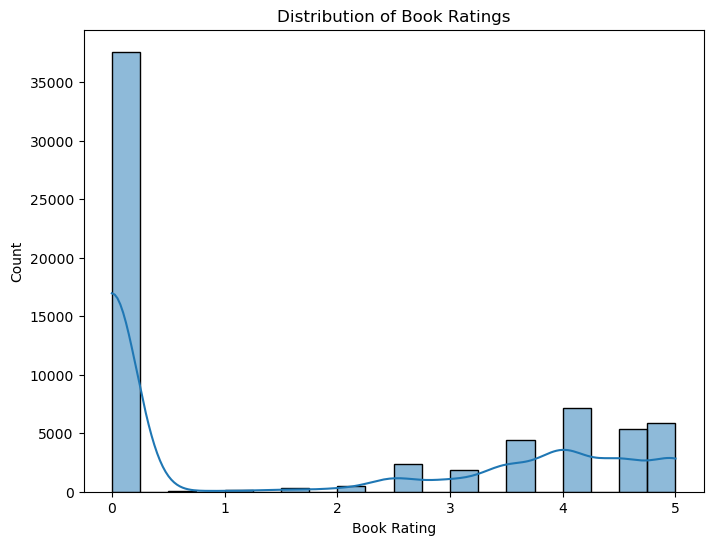

In [106]:
# Data visualization
# Let's plot some visualizations to understand the data better

# Distribution of User Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['book_rating'], bins=20, kde=True)
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.show()

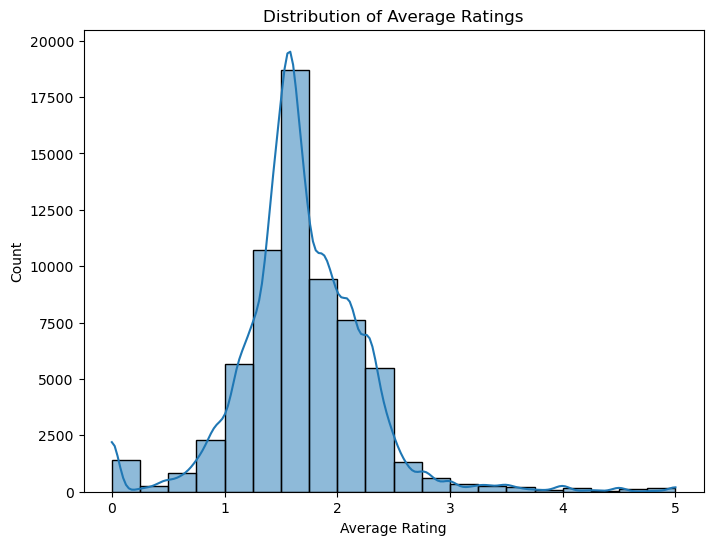

In [107]:
# Distribution of Average Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_rating'], bins=20, kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Average Ratings')
plt.show()

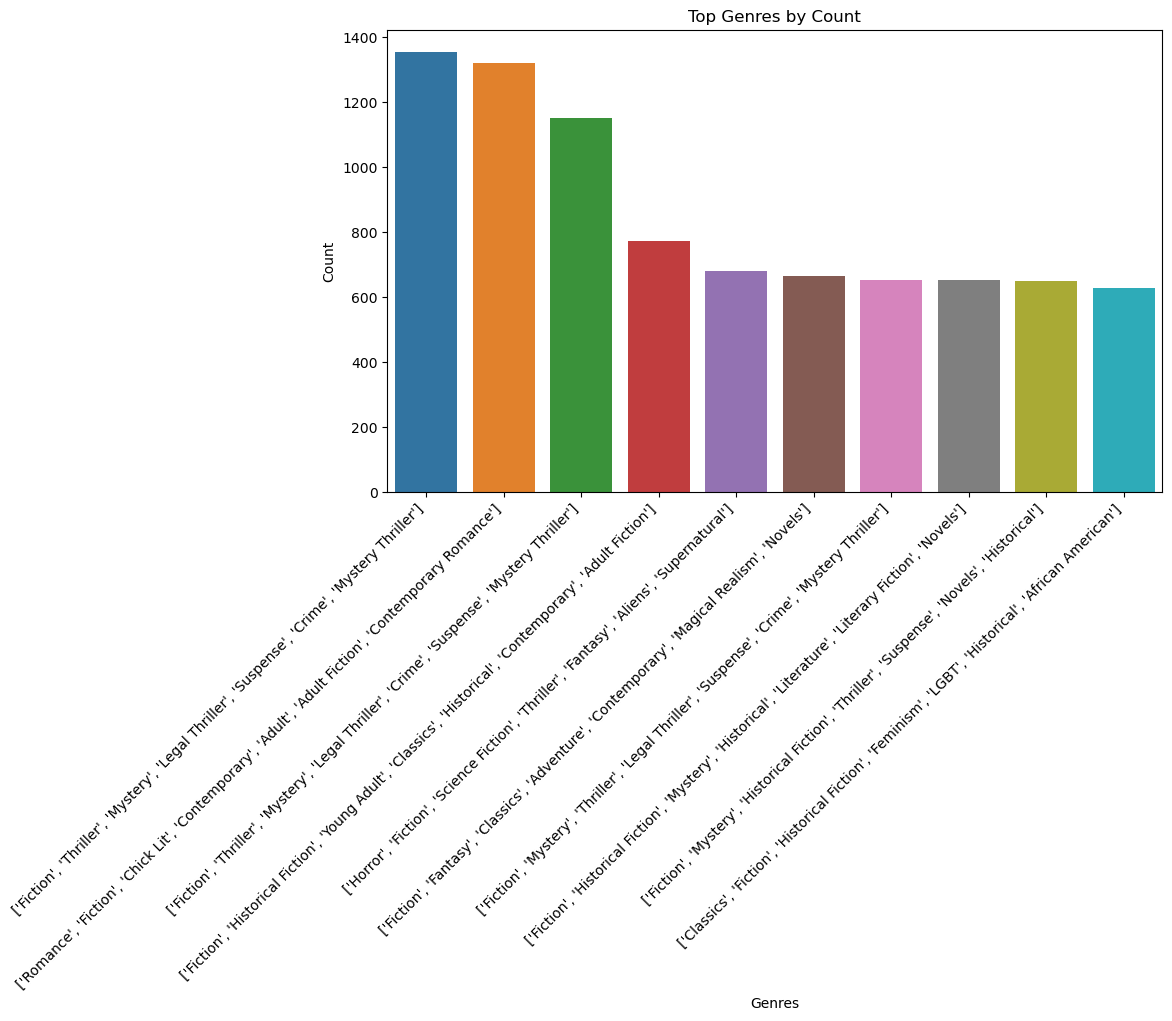

In [108]:
# Top Genres by Count
top_genres = df['Genres'].explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top Genres by Count')
plt.xticks(rotation=45, ha='right')
plt.show()

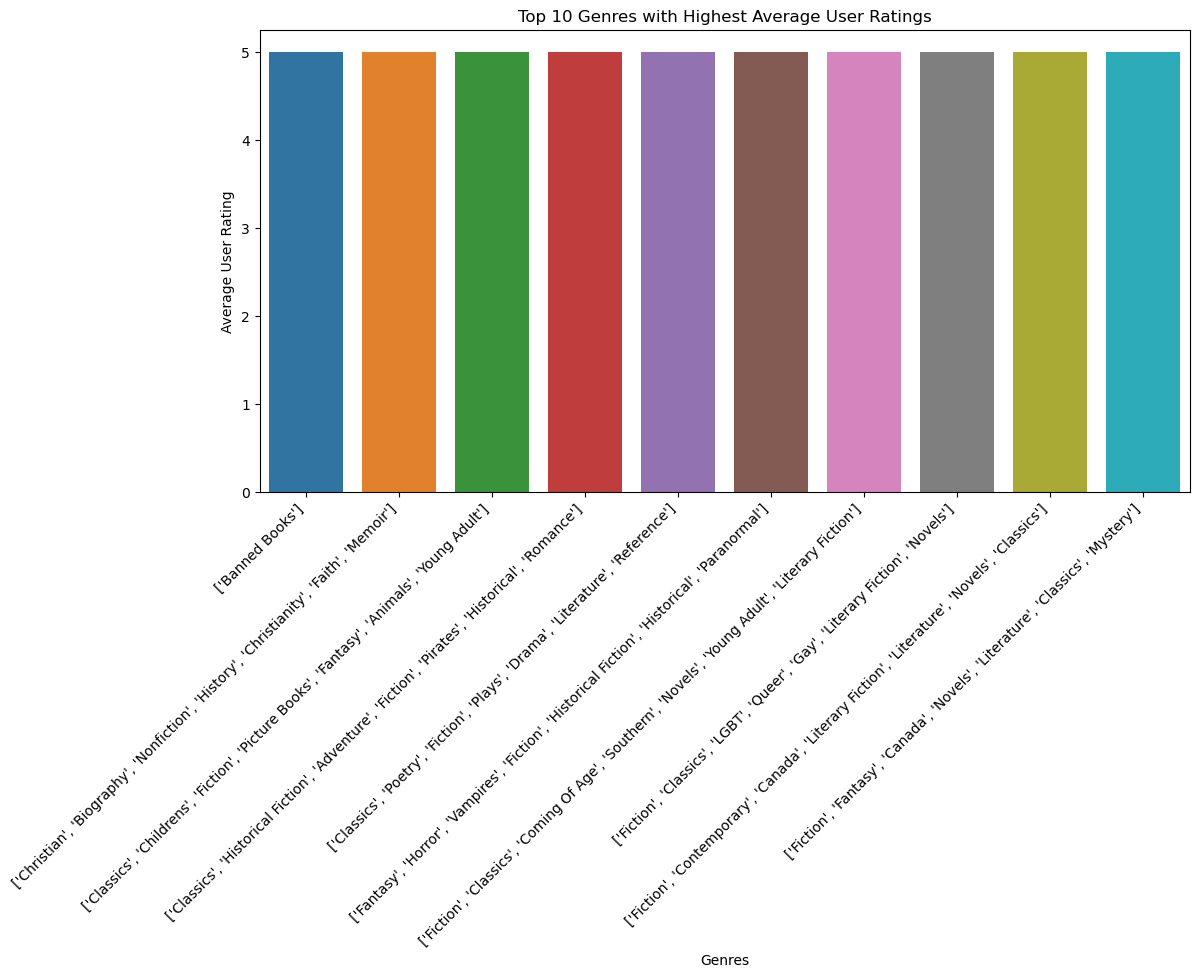

In [109]:
# Calculate average user ratings by genre
avg_rating_by_genre =  df.explode('Genres').groupby('Genres')['book_rating'].mean().reset_index()

# Select the top N genres with the highest average user ratings
top_n_genres = 10  # Replace this with the desired number of top genres
top_avg_rating_by_genre = avg_rating_by_genre.nlargest(top_n_genres, 'book_rating')

# Create the bar plot for the top N genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg_rating_by_genre['Genres'], y=top_avg_rating_by_genre['book_rating'])
plt.xlabel('Genres')
plt.ylabel('Average User Rating')
plt.title(f'Top {top_n_genres} Genres with Highest Average User Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

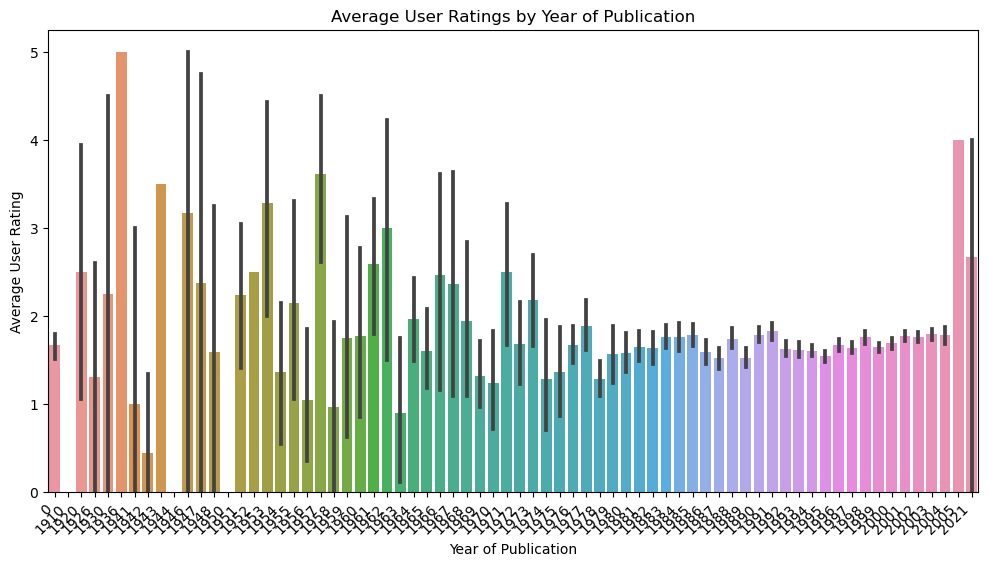

In [110]:
# Average User Ratings by Year of Publication
plt.figure(figsize=(12, 6))
sns.barplot(x= df['year_of_publication'], y= df['book_rating'])
plt.xlabel('Year of Publication')
plt.ylabel('Average User Rating')
plt.title('Average User Ratings by Year of Publication')
plt.xticks(rotation=45, ha='right')
plt.show()

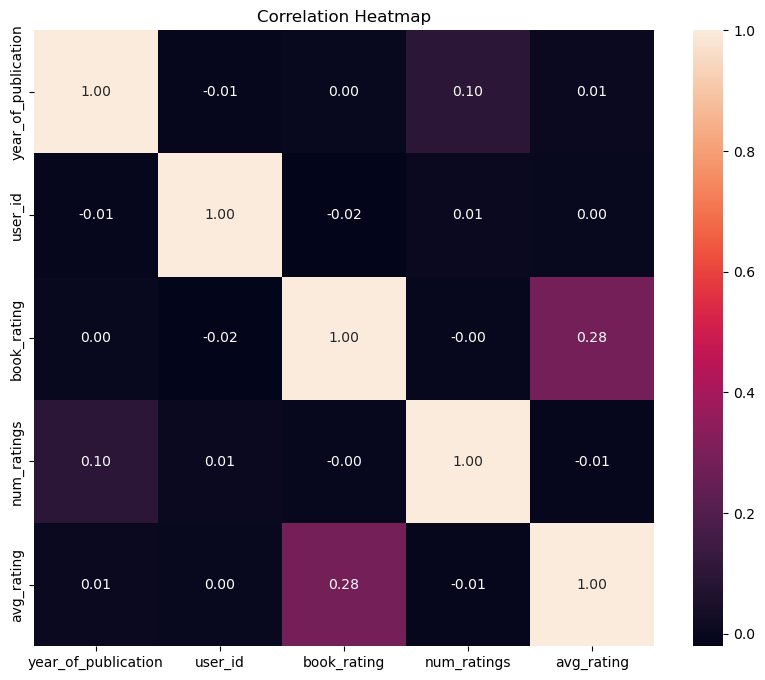

In [111]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Model building

 ## 1) Popularity based model

#### i) Most read books

In [112]:
# Top 10 books
most_read_books=pd.DataFrame(df[['book_title']].value_counts()[:10]).reset_index()[['book_title']]
most_read_books

,book_title
0,The Secret Life of Bees
1,Life of Pi
2,The Summons
3,Snow Falling on Cedars
4,A Painted House
5,The Color Purple
6,The Testament
7,House of Sand and Fog
8,Summer Sisters
9,The Joy Luck Club


#### ii) Most Reviewed books (on average number of given ratings)

In [113]:
# By average number of ratings
most_reviewed_books_avg_num = df.groupby("book_title")['num_ratings'].mean().reset_index(name='avg_num_ratings').sort_values( by ='avg_num_ratings',ascending=False ).head(10).reset_index(drop=True)
most_reviewed_books_avg_num

,book_title,avg_num_ratings
0,A Painted House,643.036866
1,Snow Falling on Cedars,579.024502
2,Girl with a Pearl Earring,526.000000
3,The Pelican Brief,521.015238
4,House of Sand and Fog,520.408163
5,The Secret Life of Bees,504.790698
6,The Joy Luck Club,486.517117
7,The Five People You Meet in Heaven,424.041860
8,Summer Sisters,422.639576
9,A Prayer for Owen Meany,411.004843


#### iii) Most Reviewed books (on average ratings)

In [114]:
#Heighest Rated Books
most_reviewed_books_avg =df.groupby('book_title')['avg_rating'].mean().sort_values(ascending=False).reset_index().head(10)
most_reviewed_books_avg

,book_title,avg_rating
0,"Zen Flesh, Zen Bones: A Collection of Zen and ...",5.0
1,The Shipping News,5.0
2,The Illustrated Man,5.0
3,A Single Man,5.0
4,The Member of the Wedding,5.0
5,The Mysteries of Harris Burdick,5.0
6,Courage: The Joy of Living Dangerously,5.0
7,Captain Blood,5.0
8,Body of Secrets: Anatomy of the Ultra-Secret N...,5.0
9,The Story of Ferdinand,5.0


#### iv) Popular books by location

In [115]:
# By City
groupby_city_df = df.groupby(['City', 'book_title'])['num_ratings'].sum().reset_index(name='total_ratings').sort_values(by='total_ratings', ascending=False)
popular_books_city = groupby_city_df.groupby('City').head(1).reset_index(drop=True).head(10)
popular_books_city

,City,book_title,total_ratings
0,portland,Snow Falling on Cedars,7368
1,chicago,Snow Falling on Cedars,7368
2,san francisco,The Secret Life of Bees,5841
3,toronto,The Pelican Brief,5753
4,vancouver,Snow Falling on Cedars,5526
5,sacramento,The Secret Life of Bees,4920
6,seattle,Girl with a Pearl Earring,4734
7,olympia,A Painted House,4529
8,ottawa,A Painted House,4529
9,austin,The Secret Life of Bees,4401


In [116]:
# By state
groupby_state_df = df.groupby(['State', 'book_title'])['num_ratings'].sum().reset_index(name='total_ratings').sort_values(by='total_ratings', ascending=False)
popular_books_state = groupby_state_df.groupby('State').head(1).reset_index(drop=True).head(10)
popular_books_state

,State,book_title,total_ratings
0,california,The Secret Life of Bees,59664
1,texas,The Secret Life of Bees,24387
2,florida,A Painted House,21998
3,illinois,The Secret Life of Bees,18703
4,ontario,The Pelican Brief,18305
5,washington,A Painted House,16175
6,oregon,Snow Falling on Cedars,16001
7,virginia,A Painted House,14881
8,british columbia,The Joy Luck Club,14532
9,new jersey,The Secret Life of Bees,12798


In [117]:
# by country
groupby_country_df = df.groupby(['Country', 'book_title'])['num_ratings'].sum().reset_index(name='total_ratings').sort_values(by='total_ratings', ascending=False)
groupby_country_df = groupby_country_df.groupby('Country').head(1).reset_index(drop=True).head(10)
popular_books_country = groupby_country_df.drop(groupby_country_df[groupby_country_df['Country'] == ''].index)
popular_books_country

,Country,book_title,total_ratings
0,usa,A Painted House,351972
1,canada,The Pelican Brief,46024
3,united kingdom,Life of Pi,12810
4,portugal,Girl with a Pearl Earring,10520
5,australia,Girl with a Pearl Earring,8942
6,new zealand,Life of Pi,5082
7,spain,Girl with a Pearl Earring,4734
8,malaysia,The Catcher in the Rye,4440
9,germany,The Testament,3826


## 2) Collaborative filtering based

## Model 1 (user_ratings-book similarity)

In [118]:
# Making Pivot Table on user_id and book_title and values are book_ratings
pt = df.pivot_table(index='book_title',columns='user_id',values='book_rating')

In [119]:
# Filling na values with 0
pt.fillna(0,inplace = True)

In [120]:
# Seeing the pivot table
pt

user_id,8,9,16,26,32,53,67,75,77,91,...,278720,278769,278773,278781,278796,278813,278843,278844,278846,278849
book_title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1421: The Year China Discovered America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Can Heal Your Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Can't Go Home Again,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Young Goodman Brown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# importing cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity

In [122]:
# assigning similarity scores as veriable for cosine similarity of pt
similarity_scores = cosine_similarity(pt)

In [123]:
# Seeing the similarity score
similarity_scores
# as we can see similarity score just giving the numbers not the serial number because we need to print that book name as well so we would use enumerate which would give everything a serial number

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [124]:
# seeing list of enomerated similiraty score (here for index 3 value)
list(enumerate(similarity_scores[3]))

[(0, 0.01580478781425102),
 (1, 0.0),
 (2, 0.0),
 (3, 1.0000000000000004),
 (4, 0.0),
 (5, 0.04925143076415897),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.00851602452084774),
 (10, 0.0),
 (11, 0.03217303976140594),
 (12, 0.0),
 (13, 0.0),
 (14, 0.023823234513316395),
 (15, 0.0),
 (16, 0.0),
 (17, 0.04297634726662988),
 (18, 0.0),
 (19, 0.0),
 (20, 0.025170250682915687),
 (21, 0.0),
 (22, 0.009726673137260838),
 (23, 0.0),
 (24, 0.006521578242775227),
 (25, 0.011513014798928045),
 (26, 0.0),
 (27, 0.021309480813685784),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0190724061950429),
 (31, 0.01970364664454588),
 (32, 0.0),
 (33, 0.0),
 (34, 0.013032505583642932),
 (35, 0.0),
 (36, 0.0),
 (37, 0.02497671264110992),
 (38, 0.0),
 (39, 0.015650594459153764),
 (40, 0.0),
 (41, 0.01583226677811105),
 (42, 0.0),
 (43, 0.023876356407932904),
 (44, 0.0),
 (45, 0.03290400137694257),
 (46, 0.0),
 (47, 0.0),
 (48, 0.027190137388597588),
 (49, 0.0),
 (50, 0.024073728771885978),
 (51, 0.0),
 (52, 0.0),
 (53, 0.00590

In [125]:
# by this we can see for the index vallue we need to run below command for pivot table
np.where(pt.index=='1984')[0][0] # to see index number

3

In [126]:
# shape of the similarity score
similarity_scores.shape

(1519, 1519)

In [127]:
# to see books similar to the book 1984 (just for example)
sorted(list(enumerate(similarity_scores[3])),key=lambda x:x[1],reverse=True)[1:6]
# lambda would take 1 index as the scale and reverse would make it sort by high to low value
# here taking [1:6] because we want to predict 5 books and the most heighest book similarity would be with its own which would be on top index[0] so taking from 1

[(104, 0.1501325122639852),
 (176, 0.12263045089546497),
 (1067, 0.10983374614451198),
 (1467, 0.1076288940581985),
 (244, 0.09496667122782221)]

In [128]:
# making a function so we can directly use that for recommendation
def recommend_col1(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    data = []
    for i in similar_items:
        item = []
        df1 = df[df['book_title'] == pt.index[i[0]]]
        item.extend(list(df1.drop_duplicates('book_title')['book_title'].values))
        item.extend(list(df1.drop_duplicates('book_title')['book_author'].values))
        item.extend(list(df1.drop_duplicates('book_title')['Genres'].values))

        data.append(item)

    return data

In [129]:
# recommendations for book 1984
recommend_col1('1984')

[['Animal Farm',
  'George Orwell',
  "['Classics', 'Fiction', 'Dystopia', 'Fantasy', 'Politics', 'School', 'Literature']"],
 ['Brave New World',
  'Aldous Huxley',
  "['Classics', 'Fiction', 'Science Fiction', 'Dystopia', 'Literature', 'Novels', 'School']"],
 ['The Glass Menagerie',
  'Tennessee Williams',
  "['Plays', 'Classics', 'Drama', 'Fiction', 'School', 'Theatre', 'Literature']"],
 ['We',
  'Yevgeny Zamyatin',
  "['Fiction', 'Science Fiction', 'Classics', 'Dystopia', 'Russia', 'Russian Literature', 'Literature']"],
 ['Crash',
  'J.G. Ballard',
  "['Fiction', 'Science Fiction', 'Literature', 'Novels', 'Horror', 'Classics', 'British Literature']"]]

In [130]:
# Recommendation for book The Kitchen God's Wife
recommend_col1("The Kitchen God's Wife")

[['The Joy Luck Club',
  'Amy Tan',
  "['Fiction', 'Historical Fiction', 'Classics', 'China', 'Contemporary', 'Adult Fiction', 'Adult']"],
 ["The Bonesetter's Daughter",
  'Amy Tan',
  "['Fiction', 'Historical Fiction', 'China', 'Asia', 'Historical', 'Contemporary', 'Asian Literature']"],
 ['The Eagle of the Ninth',
  'Rosemary Sutcliff',
  "['Historical Fiction', 'Fiction', 'Historical', 'Young Adult', 'Adventure', 'Classics', 'Childrens']"],
 ['Alexander Hamilton',
  'Ron Chernow',
  "['History', 'Biography', 'Nonfiction', 'American History', 'Politics', 'Audiobook', 'Historical']"],
 ['Genghis Khan and the Making of the Modern World',
  'Jack Weatherford',
  "['History', 'Nonfiction', 'Biography', 'Asia', 'Historical', 'World History', 'Audiobook']"]]

In [131]:
# Recommendations for book The Deptford Trilogy
recommend_col1("The Deptford Trilogy")

[["'Salem's Lot",
  'Stephen King',
  "['Horror', 'Fiction', 'Vampires', 'Fantasy', 'Thriller', 'Paranormal', 'Supernatural']"],
 ['1421: The Year China Discovered America',
  'Gavin Menzies',
  "['History', 'Nonfiction', 'China', 'Historical', 'Asia', 'World History', 'Travel']"],
 ['1812',
  'David Nevin',
  "['Historical Fiction', 'Fiction', 'American History', 'War', 'Historical', 'American', 'Military Fiction']"],
 ['1984',
  'George Orwell',
  "['Classics', 'Fiction', 'Science Fiction', 'Dystopia', 'Literature', 'Novels', 'Politics']"],
 ['2001: A Space Odyssey',
  'Arthur C. Clarke',
  "['Science Fiction', 'Fiction', 'Classics', 'Science Fiction Fantasy', 'Space', 'Fantasy', 'Novels']"]]

## Model 2 ( book-book_features similarity)

In [132]:
# Assigning df to df_new so we can make changes in df_new for new model
df_new = df[['ISBN', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'user_id', 'book_rating', 'num_ratings', 'avg_rating', 'Age', 'City',
       'State', 'Country', 'Description', 'Genres']]
df_new

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,4.5,33,2.106061,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
2,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,11676,4.0,273,1.437729,Child,,,,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
3,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,85526,0.0,273,1.437729,Adult,victoria,british columbia,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
4,080410753X,The Kitchen God's Wife,Amy Tan,1992,Ivy Books,110912,4.5,273,1.437729,Adult,milpitas,california,usa,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65671,0553262165,Farewell to Manzanar: A True Story of Japanese...,Jeanne Wakatsuki Houston,1986,Bantam Books,130717,4.0,1,4.000000,Child,longmont,colorado,usa,Jeanne Wakatsuki was seven years old in 1942 w...,"['Nonfiction', 'History', 'Memoir', 'Biography..."
65672,0060907924,A People's History of the United States,Howard Zinn,1980,Harpercollins,188029,5.0,1,5.000000,Adult,stockton,california,usa,"In the book, Zinn presented a different side o...","['History', 'Nonfiction', 'Politics', 'America..."
65673,0451525256,The Ox-Bow Incident,Walter Van Tilburg Clark,1996,Signet Classics,77074,2.5,1,2.500000,Adult,wynne,arkansas,usa,"Set in 1885, The Ox-Bow Incident is a searing ...","['Fiction', 'Westerns', 'Classics', 'Historica..."
65674,1840184159,First They Killed My Father: A Daughter of Cam...,Loung Ung,2001,Mainstream Publishing,79481,0.0,1,0.000000,Adult,london,england,united kingdom,From a childhood survivor of the Cambodian gen...,"['Nonfiction', 'History', 'Memoir', 'Biography..."


In [133]:
# dropping the all the rows which contains duplicated book_title and resetting the indexes
df_new = df_new.drop_duplicates(subset=['book_title'])
df_new = df_new.reset_index(drop=True)
df_new

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,"['Fiction', 'Historical Fiction', 'China', 'As..."
1,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,4.5,427,2.271663,Adult,ottawa,ontario,canada,From the author of the phenomenal #1 New York ...,"['Fiction', 'Inspirational', 'Contemporary', '..."
2,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,3.0,170,2.250000,Adult,ottawa,ontario,canada,Life of Pi is a fantasy adventure novel by Yan...,"['Fiction', 'Fantasy', 'Classics', 'Adventure'..."
3,0060958022,Five Quarters of the Orange,Joanne Harris,2002,Perennial,11400,5.0,148,1.719595,Adult,ottawa,ontario,canada,The novels of Joanne Harris are a literary fea...,"['Fiction', 'Historical Fiction', 'France', 'H..."
4,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books,11400,0.0,552,1.519928,Adult,ottawa,ontario,canada,In this “page-turner with a beating heart” (Bo...,"['Fiction', 'Contemporary', 'Literary Fiction'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0553262165,Farewell to Manzanar: A True Story of Japanese...,Jeanne Wakatsuki Houston,1986,Bantam Books,130717,4.0,1,4.000000,Child,longmont,colorado,usa,Jeanne Wakatsuki was seven years old in 1942 w...,"['Nonfiction', 'History', 'Memoir', 'Biography..."
1515,0060907924,A People's History of the United States,Howard Zinn,1980,Harpercollins,188029,5.0,1,5.000000,Adult,stockton,california,usa,"In the book, Zinn presented a different side o...","['History', 'Nonfiction', 'Politics', 'America..."
1516,0451525256,The Ox-Bow Incident,Walter Van Tilburg Clark,1996,Signet Classics,77074,2.5,1,2.500000,Adult,wynne,arkansas,usa,"Set in 1885, The Ox-Bow Incident is a searing ...","['Fiction', 'Westerns', 'Classics', 'Historica..."
1517,1840184159,First They Killed My Father: A Daughter of Cam...,Loung Ung,2001,Mainstream Publishing,79481,0.0,1,0.000000,Adult,london,england,united kingdom,From a childhood survivor of the Cambodian gen...,"['Nonfiction', 'History', 'Memoir', 'Biography..."


In [134]:
# made to show output
df_new1 = df_new.copy(deep=True)

In [135]:
# seeing the genre column
df_new['Genres']

0       ['Fiction', 'Historical Fiction', 'China', 'As...
1       ['Fiction', 'Inspirational', 'Contemporary', '...
2       ['Fiction', 'Fantasy', 'Classics', 'Adventure'...
3       ['Fiction', 'Historical Fiction', 'France', 'H...
4       ['Fiction', 'Contemporary', 'Literary Fiction'...
                              ...                        
1514    ['Nonfiction', 'History', 'Memoir', 'Biography...
1515    ['History', 'Nonfiction', 'Politics', 'America...
1516    ['Fiction', 'Westerns', 'Classics', 'Historica...
1517    ['Nonfiction', 'History', 'Memoir', 'Biography...
1518    ['Fiction', 'Fantasy', 'Canada', 'Novels', 'Li...
Name: Genres, Length: 1519, dtype: object

In [136]:
# for index 0 seeing the genre value
df['Genres'][0]

"['Fiction', 'Historical Fiction', 'China', 'Asia', 'Contemporary', 'Asian Literature', 'Novels']"

In [137]:
# removing all the special characters with empty strings for further processes
df_new['Genres'] = df_new['Genres'].str.replace("[", "")
df_new['Genres'] = df_new['Genres'].str.replace("'", "")
df_new['Genres'] = df_new['Genres'].str.replace("]", "")
df_new

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,"Fiction, Historical Fiction, China, Asia, Cont..."
1,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,4.5,427,2.271663,Adult,ottawa,ontario,canada,From the author of the phenomenal #1 New York ...,"Fiction, Inspirational, Contemporary, Fantasy,..."
2,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,3.0,170,2.250000,Adult,ottawa,ontario,canada,Life of Pi is a fantasy adventure novel by Yan...,"Fiction, Fantasy, Classics, Adventure, Contemp..."
3,0060958022,Five Quarters of the Orange,Joanne Harris,2002,Perennial,11400,5.0,148,1.719595,Adult,ottawa,ontario,canada,The novels of Joanne Harris are a literary fea...,"Fiction, Historical Fiction, France, Historica..."
4,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books,11400,0.0,552,1.519928,Adult,ottawa,ontario,canada,In this “page-turner with a beating heart” (Bo...,"Fiction, Contemporary, Literary Fiction, Adult..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0553262165,Farewell to Manzanar: A True Story of Japanese...,Jeanne Wakatsuki Houston,1986,Bantam Books,130717,4.0,1,4.000000,Child,longmont,colorado,usa,Jeanne Wakatsuki was seven years old in 1942 w...,"Nonfiction, History, Memoir, Biography, School..."
1515,0060907924,A People's History of the United States,Howard Zinn,1980,Harpercollins,188029,5.0,1,5.000000,Adult,stockton,california,usa,"In the book, Zinn presented a different side o...","History, Nonfiction, Politics, American Histor..."
1516,0451525256,The Ox-Bow Incident,Walter Van Tilburg Clark,1996,Signet Classics,77074,2.5,1,2.500000,Adult,wynne,arkansas,usa,"Set in 1885, The Ox-Bow Incident is a searing ...","Fiction, Westerns, Classics, Historical Fictio..."
1517,1840184159,First They Killed My Father: A Daughter of Cam...,Loung Ung,2001,Mainstream Publishing,79481,0.0,1,0.000000,Adult,london,england,united kingdom,From a childhood survivor of the Cambodian gen...,"Nonfiction, History, Memoir, Biography, Asia, ..."


In [138]:
# now again seeing the genre columns value for index 0
df_new['Genres'][0]

'Fiction, Historical Fiction, China, Asia, Contemporary, Asian Literature, Novels'

In [139]:
# changing year of publication column to datatype str for further use
df_new['year_of_publication'] = df_new['year_of_publication'].astype(str)
df_new['year_of_publication'].unique()

array(['1991', '2003', '2002', '2000', '1998', '1996', '1999', '1997',
       '1988', '1994', '1983', '1987', '1995', '2001', '2004', '1989',
       '1993', '1976', '1990', '0', '1986', '1978', '1982', '1985',
       '1992', '1984', '1981', '1979', '1980', '1920', '1969', '1977',
       '1964', '1972', '1960', '1974', '1965', '1926', '1963', '1958',
       '1956', '1944', '1973', '1975', '1968', '1971', '1942', '1957',
       '1970', '1955', '1953', '1966', '1967', '1941', '1947', '1959',
       '1936', '1962', '1950', '1946', '1952'], dtype=object)

In [140]:
# seeing the column names
df_new.columns

Index(['ISBN', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'user_id', 'book_rating', 'num_ratings', 'avg_rating', 'Age', 'City',
       'State', 'Country', 'Description', 'Genres'],
      dtype='object')

In [141]:
# for book_author, Genres and Publisher column removing spaces between the two words so we can consider it as 1
df_new['book_author'] = df_new['book_author'].str.replace(" ", "")
df_new['Genres'] = df_new['Genres'].str.replace(" ", "")
df_new['publisher'] = df_new['publisher'].str.replace(" ", "")
df_new

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,AmyTan,1991,PutnamPubGroup,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,"Fiction,HistoricalFiction,China,Asia,Contempor..."
1,0786868716,The Five People You Meet in Heaven,MitchAlbom,2003,Hyperion,11400,4.5,427,2.271663,Adult,ottawa,ontario,canada,From the author of the phenomenal #1 New York ...,"Fiction,Inspirational,Contemporary,Fantasy,Cla..."
2,0151008116,Life of Pi,YannMartel,2002,Harcourt,11400,3.0,170,2.250000,Adult,ottawa,ontario,canada,Life of Pi is a fantasy adventure novel by Yan...,"Fiction,Fantasy,Classics,Adventure,Contemporar..."
3,0060958022,Five Quarters of the Orange,JoanneHarris,2002,Perennial,11400,5.0,148,1.719595,Adult,ottawa,ontario,canada,The novels of Joanne Harris are a literary fea...,"Fiction,HistoricalFiction,France,Historical,Fo..."
4,0375727345,House of Sand and Fog,AndreDubusIII,2000,VintageBooks,11400,0.0,552,1.519928,Adult,ottawa,ontario,canada,In this “page-turner with a beating heart” (Bo...,"Fiction,Contemporary,LiteraryFiction,AdultFict..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0553262165,Farewell to Manzanar: A True Story of Japanese...,JeanneWakatsukiHouston,1986,BantamBooks,130717,4.0,1,4.000000,Child,longmont,colorado,usa,Jeanne Wakatsuki was seven years old in 1942 w...,"Nonfiction,History,Memoir,Biography,School,His..."
1515,0060907924,A People's History of the United States,HowardZinn,1980,Harpercollins,188029,5.0,1,5.000000,Adult,stockton,california,usa,"In the book, Zinn presented a different side o...","History,Nonfiction,Politics,AmericanHistory,Hi..."
1516,0451525256,The Ox-Bow Incident,WalterVanTilburgClark,1996,SignetClassics,77074,2.5,1,2.500000,Adult,wynne,arkansas,usa,"Set in 1885, The Ox-Bow Incident is a searing ...","Fiction,Westerns,Classics,HistoricalFiction,Li..."
1517,1840184159,First They Killed My Father: A Daughter of Cam...,LoungUng,2001,MainstreamPublishing,79481,0.0,1,0.000000,Adult,london,england,united kingdom,From a childhood survivor of the Cambodian gen...,"Nonfiction,History,Memoir,Biography,Asia,War,B..."


In [142]:
# Removing the comma ',' from genre column
df_new['Genres'] = df_new['Genres'].str.replace(",", " ")
df_new

,ISBN,book_title,book_author,year_of_publication,publisher,user_id,book_rating,num_ratings,avg_rating,Age,City,State,Country,Description,Genres
0,0399135782,The Kitchen God's Wife,AmyTan,1991,PutnamPubGroup,8,0.0,33,2.106061,Child,timmins,ontario,canada,Winnie and Helen have kept each other's worst ...,Fiction HistoricalFiction China Asia Contempor...
1,0786868716,The Five People You Meet in Heaven,MitchAlbom,2003,Hyperion,11400,4.5,427,2.271663,Adult,ottawa,ontario,canada,From the author of the phenomenal #1 New York ...,Fiction Inspirational Contemporary Fantasy Cla...
2,0151008116,Life of Pi,YannMartel,2002,Harcourt,11400,3.0,170,2.250000,Adult,ottawa,ontario,canada,Life of Pi is a fantasy adventure novel by Yan...,Fiction Fantasy Classics Adventure Contemporar...
3,0060958022,Five Quarters of the Orange,JoanneHarris,2002,Perennial,11400,5.0,148,1.719595,Adult,ottawa,ontario,canada,The novels of Joanne Harris are a literary fea...,Fiction HistoricalFiction France Historical Fo...
4,0375727345,House of Sand and Fog,AndreDubusIII,2000,VintageBooks,11400,0.0,552,1.519928,Adult,ottawa,ontario,canada,In this “page-turner with a beating heart” (Bo...,Fiction Contemporary LiteraryFiction AdultFict...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0553262165,Farewell to Manzanar: A True Story of Japanese...,JeanneWakatsukiHouston,1986,BantamBooks,130717,4.0,1,4.000000,Child,longmont,colorado,usa,Jeanne Wakatsuki was seven years old in 1942 w...,Nonfiction History Memoir Biography School His...
1515,0060907924,A People's History of the United States,HowardZinn,1980,Harpercollins,188029,5.0,1,5.000000,Adult,stockton,california,usa,"In the book, Zinn presented a different side o...",History Nonfiction Politics AmericanHistory Hi...
1516,0451525256,The Ox-Bow Incident,WalterVanTilburgClark,1996,SignetClassics,77074,2.5,1,2.500000,Adult,wynne,arkansas,usa,"Set in 1885, The Ox-Bow Incident is a searing ...",Fiction Westerns Classics HistoricalFiction Li...
1517,1840184159,First They Killed My Father: A Daughter of Cam...,LoungUng,2001,MainstreamPublishing,79481,0.0,1,0.000000,Adult,london,england,united kingdom,From a childhood survivor of the Cambodian gen...,Nonfiction History Memoir Biography Asia War B...


In [143]:
# merging below specified columns in a single new tags column so we can see text similarity
columns = ['book_author', 'Genres', 'year_of_publication', 'publisher', 'Description']
# Adding spaces between concatenated values
df_new['tags'] = df_new[columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [144]:
# seeing tags column value at index 1
df_new.tags[1]

'MitchAlbom Fiction Inspirational Contemporary Fantasy Classics Spirituality Adult 2003 Hyperion From the author of the phenomenal #1 New York Times bestseller Tuesdays with Morrie, a novel that explores the unexpected connections of our lives, and the idea that heaven is more than a place; it\'s an answer. Eddie is a wounded war veteran, an old man who has lived, in his mind, an uninspired life. His job is fixing rides at a seaside amusement park. On his 83rd birthday, a tragic accident kills him as he tries to save a little girl from a falling cart. He awakes in the afterlife, where he learns that heaven is not a destination. It\'s a place where your life is explained to you by five people, some of whom you knew, others who may have been strangers. One by one, from childhood to soldier to old age, Eddie\'s five people revisit their connections to him on earth, illuminating the mysteries of his "meaningless" life, and revealing the haunting secret behind the eternal question: "Why was

In [145]:
# making lower case the tags column
df_new.tags = df_new.tags.apply(lambda x:x.lower())

In [146]:
# again seeing the tags column at index 1
df_new.tags[1]

'mitchalbom fiction inspirational contemporary fantasy classics spirituality adult 2003 hyperion from the author of the phenomenal #1 new york times bestseller tuesdays with morrie, a novel that explores the unexpected connections of our lives, and the idea that heaven is more than a place; it\'s an answer. eddie is a wounded war veteran, an old man who has lived, in his mind, an uninspired life. his job is fixing rides at a seaside amusement park. on his 83rd birthday, a tragic accident kills him as he tries to save a little girl from a falling cart. he awakes in the afterlife, where he learns that heaven is not a destination. it\'s a place where your life is explained to you by five people, some of whom you knew, others who may have been strangers. one by one, from childhood to soldier to old age, eddie\'s five people revisit their connections to him on earth, illuminating the mysteries of his "meaningless" life, and revealing the haunting secret behind the eternal question: "why was

In [147]:
# dropping below columns because we won't use them in the further calculation
df_new.drop(columns = ['year_of_publication', 'publisher',
       'user_id', 'book_rating', 'num_ratings', 'avg_rating', 'Age', 'City',
       'State', 'Country', 'Description'],inplace = True)
df_new

,ISBN,book_title,book_author,Genres,tags
0,0399135782,The Kitchen God's Wife,AmyTan,Fiction HistoricalFiction China Asia Contempor...,amytan fiction historicalfiction china asia co...
1,0786868716,The Five People You Meet in Heaven,MitchAlbom,Fiction Inspirational Contemporary Fantasy Cla...,mitchalbom fiction inspirational contemporary ...
2,0151008116,Life of Pi,YannMartel,Fiction Fantasy Classics Adventure Contemporar...,yannmartel fiction fantasy classics adventure ...
3,0060958022,Five Quarters of the Orange,JoanneHarris,Fiction HistoricalFiction France Historical Fo...,joanneharris fiction historicalfiction france ...
4,0375727345,House of Sand and Fog,AndreDubusIII,Fiction Contemporary LiteraryFiction AdultFict...,andredubusiii fiction contemporary literaryfic...
...,...,...,...,...,...
1514,0553262165,Farewell to Manzanar: A True Story of Japanese...,JeanneWakatsukiHouston,Nonfiction History Memoir Biography School His...,jeannewakatsukihouston nonfiction history memo...
1515,0060907924,A People's History of the United States,HowardZinn,History Nonfiction Politics AmericanHistory Hi...,howardzinn history nonfiction politics america...
1516,0451525256,The Ox-Bow Incident,WalterVanTilburgClark,Fiction Westerns Classics HistoricalFiction Li...,waltervantilburgclark fiction westerns classic...
1517,1840184159,First They Killed My Father: A Daughter of Cam...,LoungUng,Nonfiction History Memoir Biography Asia War B...,loungung nonfiction history memoir biography a...


In [148]:
# importing portersteammer which makes similar words to a same words so that model not give any exta importanceto similar words 
# assigning it to a variable as well
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [149]:
# Defining a function so we can use it in whole column
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [150]:
# to see the function working properly or not
stem('mitchalbom fiction inspirational contemporary fantasy classics spirituality adult 2003 hyperion from the author of the phenomenal #1 new york times bestseller tuesdays with morrie, a novel that explores the unexpected connections of our lives, and the idea that heaven is more than a place; it\'s an answer. eddie is a wounded war veteran, an old man who has lived, in his mind, an uninspired life. his job is fixing rides at a seaside amusement park. on his 83rd birthday, a tragic accident kills him as he tries to save a little girl from a falling cart. he awakes in the afterlife, where he learns that heaven is not a destination. it\'s a place where your life is explained to you by five people, some of whom you knew, others who may have been strangers. one by one, from childhood to soldier to old age, eddie\'s five people revisit their connections to him on earth, illuminating the mysteries of his "meaningless" life, and revealing the haunting secret behind the eternal question: "why was i here?')

'mitchalbom fiction inspir contemporari fantasi classic spiritu adult 2003 hyperion from the author of the phenomen #1 new york time bestsel tuesday with morrie, a novel that explor the unexpect connect of our lives, and the idea that heaven is more than a place; it\' an answer. eddi is a wound war veteran, an old man who ha lived, in hi mind, an uninspir life. hi job is fix ride at a seasid amus park. on hi 83rd birthday, a tragic accid kill him as he tri to save a littl girl from a fall cart. he awak in the afterlife, where he learn that heaven is not a destination. it\' a place where your life is explain to you by five people, some of whom you knew, other who may have been strangers. one by one, from childhood to soldier to old age, eddie\' five peopl revisit their connect to him on earth, illumin the mysteri of hi "meaningless" life, and reveal the haunt secret behind the etern question: "whi wa i here?'

In [151]:
# applying stem function to the tags column
df_new.tags = df_new.tags.apply(stem)

In [152]:
# now seeing tags value at index 0 that is changes worked or not
df_new.tags[0]

"amytan fiction historicalfict china asia contemporari asianliteratur novel 1991 putnampubgroup winni and helen have kept each other' worst secret for more than fifti years. now, becaus she believ she is dying, helen want to expos everything. and winni angrili determin that she must be the one to tell her daughter, pearl, about the past—includ the terribl truth even helen doe not know. and so begin winnie' stori of her life on a small island outsid shanghai in the 1920s, and other place in china dure world war ii, and trace the happi and desper event that led to winnie' come to america in 1949."

In [153]:
# Importing countvectorizer so we can remove stopwords and make similarity feature to any column
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [154]:
# applying cv which would make 5000 most frequent words as features and assigning its array to a vector variable
vector = cv.fit_transform(df_new['tags']).toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [155]:
# shape of vector variable
vector.shape

(1519, 5000)

In [156]:
# features i.e. words in the cv (here total 5000 words)
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zoo', 'буковски', 'его'], dtype=object)

In [157]:
# importing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [158]:
# assigning cosine_similarity of vector to a new similarity variable
similarity = cosine_similarity(vector)

In [159]:
# shape of the similarity
cosine_similarity(vector).shape

(1519, 1519)

In [160]:
# seeing values in similarities
similarity

array([[1.        , 0.1267754 , 0.0987826 , ..., 0.09528612, 0.10280786,
        0.07012869],
       [0.1267754 , 1.        , 0.19861801, ..., 0.11053142, 0.12493548,
        0.10846523],
       [0.0987826 , 0.19861801, 1.        , ..., 0.1531118 , 0.07079923,
        0.16903085],
       ...,
       [0.09528612, 0.11053142, 0.1531118 , ..., 1.        , 0.0711388 ,
        0.1132277 ],
       [0.10280786, 0.12493548, 0.07079923, ..., 0.0711388 , 1.        ,
        0.        ],
       [0.07012869, 0.10846523, 0.16903085, ..., 0.1132277 , 0.        ,
        1.        ]])

In [161]:
# now seeing a code that how that works 
# here we need to take the index of the book_name
df_new[df_new['book_title'] == "The Kitchen God's Wife"].index[0]

0

In [162]:
# using enomerate fuction to give index and then making its list and them sorting it on basis of the values in decending order
sorted(list(enumerate(similarity[0])),reverse=True,key = lambda x: x[1])

[(0, 1.0000000000000002),
 (1406, 0.25607375986579195),
 (1034, 0.23673339265804902),
 (616, 0.2123251450326003),
 (194, 0.20488325586666567),
 (1249, 0.20485900789263356),
 (129, 0.19917864129354076),
 (373, 0.19675422728112424),
 (31, 0.19500263255330932),
 (465, 0.1902068137461896),
 (1386, 0.18878008037275879),
 (3, 0.18824803339519158),
 (509, 0.18654788940564998),
 (68, 0.18178297416605543),
 (202, 0.18178297416605543),
 (727, 0.17982699972911248),
 (279, 0.17925163190605437),
 (428, 0.17909250925426987),
 (928, 0.1786078195719007),
 (351, 0.1757706863331389),
 (1266, 0.1739678624058566),
 (62, 0.1737137428244199),
 (1017, 0.17353397747987492),
 (476, 0.17336275496410175),
 (1322, 0.17303861116860977),
 (353, 0.17191386050265237),
 (112, 0.16996601019660118),
 (1363, 0.16937687147353955),
 (179, 0.16728647790447299),
 (1103, 0.16561869174520985),
 (819, 0.16529490122682156),
 (803, 0.16363360377426456),
 (365, 0.1619552660357832),
 (402, 0.15996800959680113),
 (882, 0.15996800959

In [163]:
# defining a function which we would use in recommendations
def recommend_col2(book):
    index = df_new[df_new['book_title'] == book].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])[1:6]

    for i in distances:
        print(df_new.iloc[i[0]].book_title)
        print(df_new1.iloc[i[0]].book_author)
        print(df_new1.iloc[i[0]].Genres)


In [164]:
# recommendation of the The Kitchen God's Wife book
recommend_col2("The Kitchen God's Wife")

The English Patient: A Screenplay
Anthony Minghella
['Fiction', 'Romance', 'Film', 'Plays', 'Media Tie In', 'Novels', 'War']
Empire of the Sun
J.G. Ballard
['Fiction', 'Historical Fiction', 'War', 'China', 'Historical', 'Classics', 'World War II']
The Return of the Soldier
Rebecca West
['Classics', 'Fiction', 'Historical Fiction', 'War', 'World War I', '20th Century', 'British Literature']
The Glass Lake
Maeve Binchy
['Fiction', 'Chick Lit', 'Ireland', 'Romance', 'Irish Literature', 'Contemporary', 'Drama']
Rich Man, Poor Man
Irwin Shaw
['Fiction', 'Classics', 'Historical Fiction', 'Drama', 'Novels', 'American', 'Contemporary']


In [165]:
# recommendation for the The English Patient: A Screenplay book
recommend_col2("The English Patient: A Screenplay")

Empire of the Sun
J.G. Ballard
['Fiction', 'Historical Fiction', 'War', 'China', 'Historical', 'Classics', 'World War II']
Birdsong
Sebastian Faulks
['Historical Fiction', 'Fiction', 'War', 'Classics', 'Historical', 'Romance', 'World War I']
The Return of the Soldier
Rebecca West
['Classics', 'Fiction', 'Historical Fiction', 'War', 'World War I', '20th Century', 'British Literature']
Birdy
William Wharton
['Fiction', 'Classics', 'War', 'Novels', 'American', 'Psychology', 'Literature']
Cold Mountain
Charles Frazier
['Historical Fiction', 'Fiction', 'Historical', 'Romance', 'Civil War', 'War', 'Classics']


In [166]:
# for comparision seeing genres of The English Patient: A Screenplay book
df[df['book_title'] == 'The English Patient: A Screenplay'].Genres.unique()

array(["['Fiction', 'Romance', 'Film', 'Plays', 'Media Tie In', 'Novels', 'War']"],
      dtype=object)

In [167]:
# seeing the The English Patient: A Screenplay recommendations in user based model as well 
recommend_col1('The English Patient: A Screenplay')

[['The Eagle of the Ninth',
  'Rosemary Sutcliff',
  "['Historical Fiction', 'Fiction', 'Historical', 'Young Adult', 'Adventure', 'Classics', 'Childrens']"],
 ['The Human Comedy',
  'William Saroyan',
  "['Fiction', 'Classics', 'Historical Fiction', 'Novels', 'Literature', 'American', 'Coming Of Age']"],
 ['A Separate Peace',
  'John Knowles',
  "['Classics', 'Fiction', 'Young Adult', 'Historical Fiction', 'School', 'Coming Of Age', 'High School']"],
 ['Beloved',
  'Toni Morrison',
  "['Fiction', 'Classics', 'Historical Fiction', 'Magical Realism', 'Literature', 'Historical', 'School']"],
 ['Animal Dreams',
  'Barbara Kingsolver',
  "['Fiction', 'Contemporary', 'Literary Fiction', 'Novels', 'Adult Fiction', 'Literature', 'Adult']"]]

# Making Pickle Files

In [168]:
# Pickle files

In [169]:
# Recommender system by Book Similarity

# book_list for recommend books names
pickle.dump(df_new.to_dict(),open('booksdict.pkl','wb'))
#book_list1 for genre and author printing
pickle.dump(df_new1.to_dict(),open('booksdict1.pkl','wb'))
# similarity scores
pickle.dump(similarity, open('similarity.pkl','wb'))

In [170]:
# Recommender system by User preferences(Ratings based)

# making pickle of df
pickle.dump(df,open('df.pkl','wb'))
# changing to dict because because of some different versions it wont work on pycharm 
# but its big file so again changing to dataframe in different file in pycharm and just adding that file because if not done than everytime we recommend by the code its gonna make dataframe to dict and dict to dataframe  
pickle.dump(pt.to_dict(),open('pivot.pkl','wb'))
# below 3 line code to run in Pycharm so the version problem get resolved
pivvt = pickle.load(open('pivot.pkl', "rb"))
pivvt = pd.DataFrame(pivvt)
pickle.dump(pivvt,open('pivot1.pkl','wb')) 
# these steps just for pycharm because it directly not working so changing to dictionary then dataframe then again dictionary

# Similarity score pkl
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))